📈 Top 6 Most Common Numbers:
12    93
21    93
33    92
18    90
38    90
6     89
Name: count, dtype: int64

📉 Top 6 Least Common Numbers:
5     61
20    63
32    63
25    65
22    67
9     67
Name: count, dtype: int64


ValueError: subplots should be a bool or an iterable

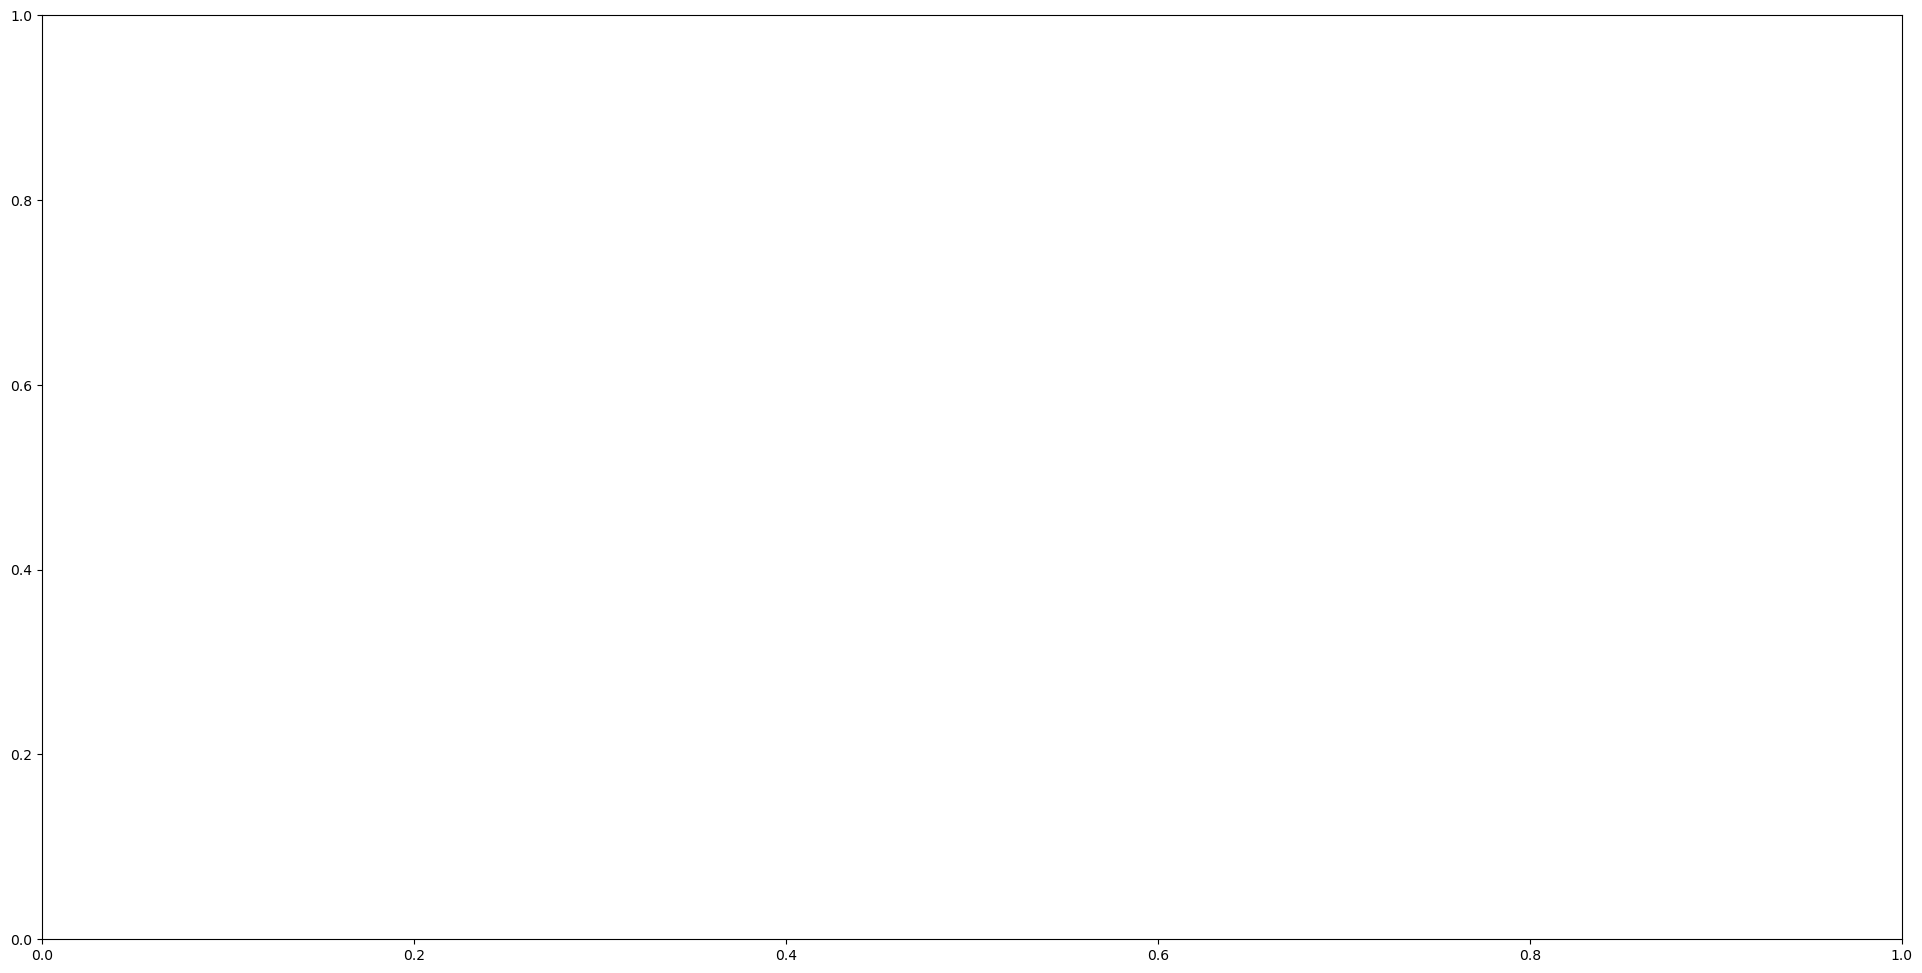

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths (update if needed)
file1 = "1_600_당첨번호.xlsx"
file2 = "601_1184_당첨번호.xlsx"

# Columns containing winning numbers (skip header rows)
# cols_needed = ["Unnamed: 1", "Unnamed: 2", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18"]
cols_needed = [1, 2, 13, 14, 15, 16, 17, 18]

# Read both files
lotto1 = pd.read_excel(file1, skiprows=2, usecols=cols_needed)
lotto2 = pd.read_excel(file2, skiprows=2, usecols=cols_needed)

# Rename columns
lotto1.columns = ["회차", "추첨일", "num1", "num2", "num3", "num4", "num5", "num6"]
lotto2.columns = ["회차", "추첨일", "num1", "num2", "num3", "num4", "num5", "num6"]

# Merge
lotto = pd.concat([lotto2], ignore_index=True)

# Drop rows with missing values
lotto = lotto.dropna(subset=["회차", "num1", "num2", "num3", "num4", "num5", "num6"])

# Convert numbers to int
for col in ["num1", "num2", "num3", "num4", "num5", "num6"]:
    lotto[col] = lotto[col].astype(int)

# Flatten all numbers into a single list
all_numbers = lotto[["num1","num2","num3","num4","num5","num6"]].values.flatten()

# Count frequency of each number
freq = pd.Series(all_numbers).value_counts().sort_index()

# Show most and least common numbers
print("📈 Top 6 Most Common Numbers:")
print(freq.sort_values(ascending=False).head(6))

print("\n📉 Top 6 Least Common Numbers:")
print(freq.sort_values().head(6))

# Plot frequency distribution
plt.figure(figsize=(24,12))
freq.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Lotto Number Frequency (Rounds 1–1184)", fontsize=16)    
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.1)
plt.grid(axis="x", linestyle="--", alpha=0.1)
plt.show()
